# Simulation of summing algorithm for 2 qubit system

In [32]:
import numpy as np

import qiskit
assert qiskit.__version__ == '1.4.1'

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

The Aer Simulator

* **AerSimulator.available_devices()** : Return the available simulation devices.
* **AerSimulator.available_methods()** : Return the available simulation methods.

## Building and visualizing The Circuit

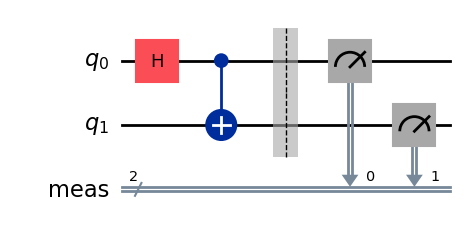

In [33]:
# Create a 2 qubit quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw(output='mpl')

## Comparing different simulation modes

In [34]:
# create simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

simulator.set_options(method='statevector')
print('Simulator available methods:', simulator.available_methods())

Simulator available methods: ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')


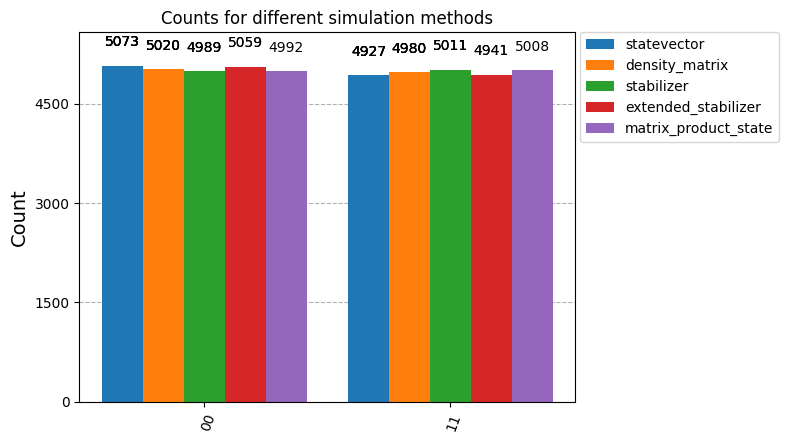

In [35]:
shots = 10000

# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(qc, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(qc, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(qc, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(qc, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(qc, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

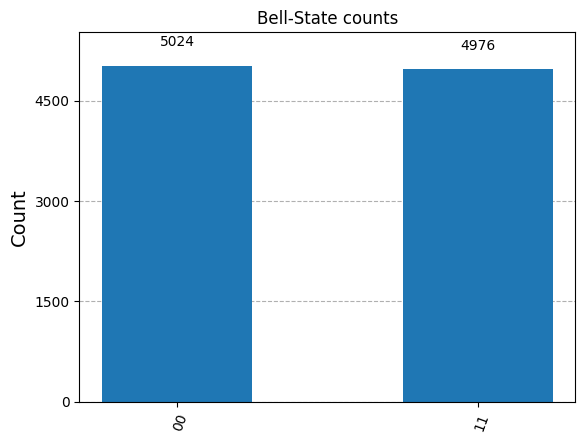

In [36]:
# Run the circuit
result = simulator.run(qc, 
                       shots=10000, # number of repetitions of the circuit
                       memory=True  # return the state of the quantum memory
                        ).result()
memory = result.get_memory(qc)
counts = result.get_counts(qc)
plot_histogram(counts, title='Bell-State counts')

## Visualizing the final statevector

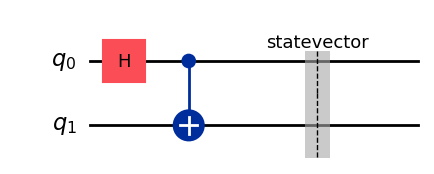

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.save_statevector()

qc.draw(output='mpl')

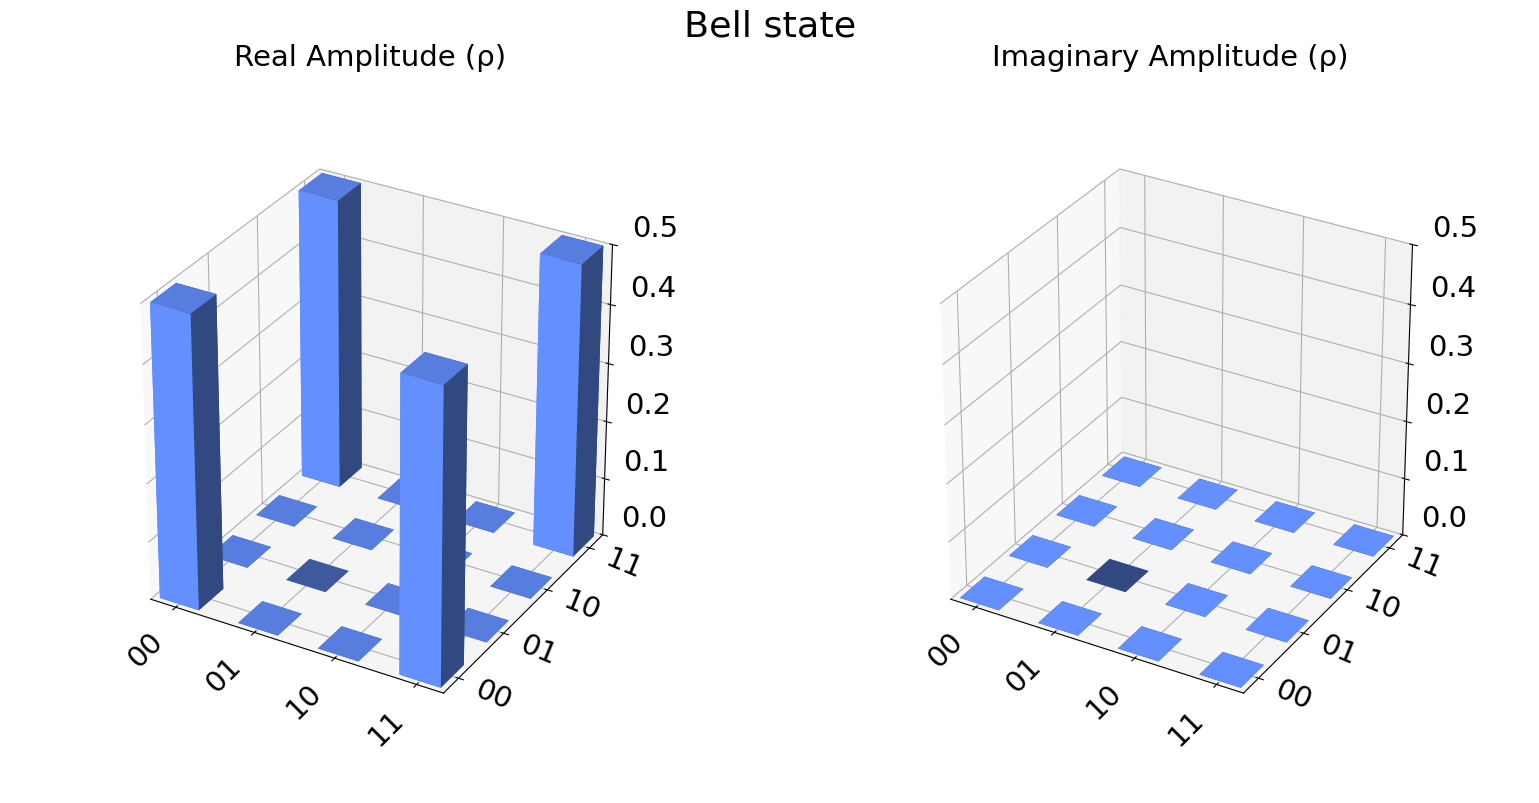

In [38]:
# Transpile for simulator
simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_state_city(statevector, title='Bell state')

In [39]:
# Construct quantum circuit without measure
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = AerSimulator(method= 'automatic')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
# state_vector = result.get_statevector(circ)
data = result.data(0)
data

{'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,))}

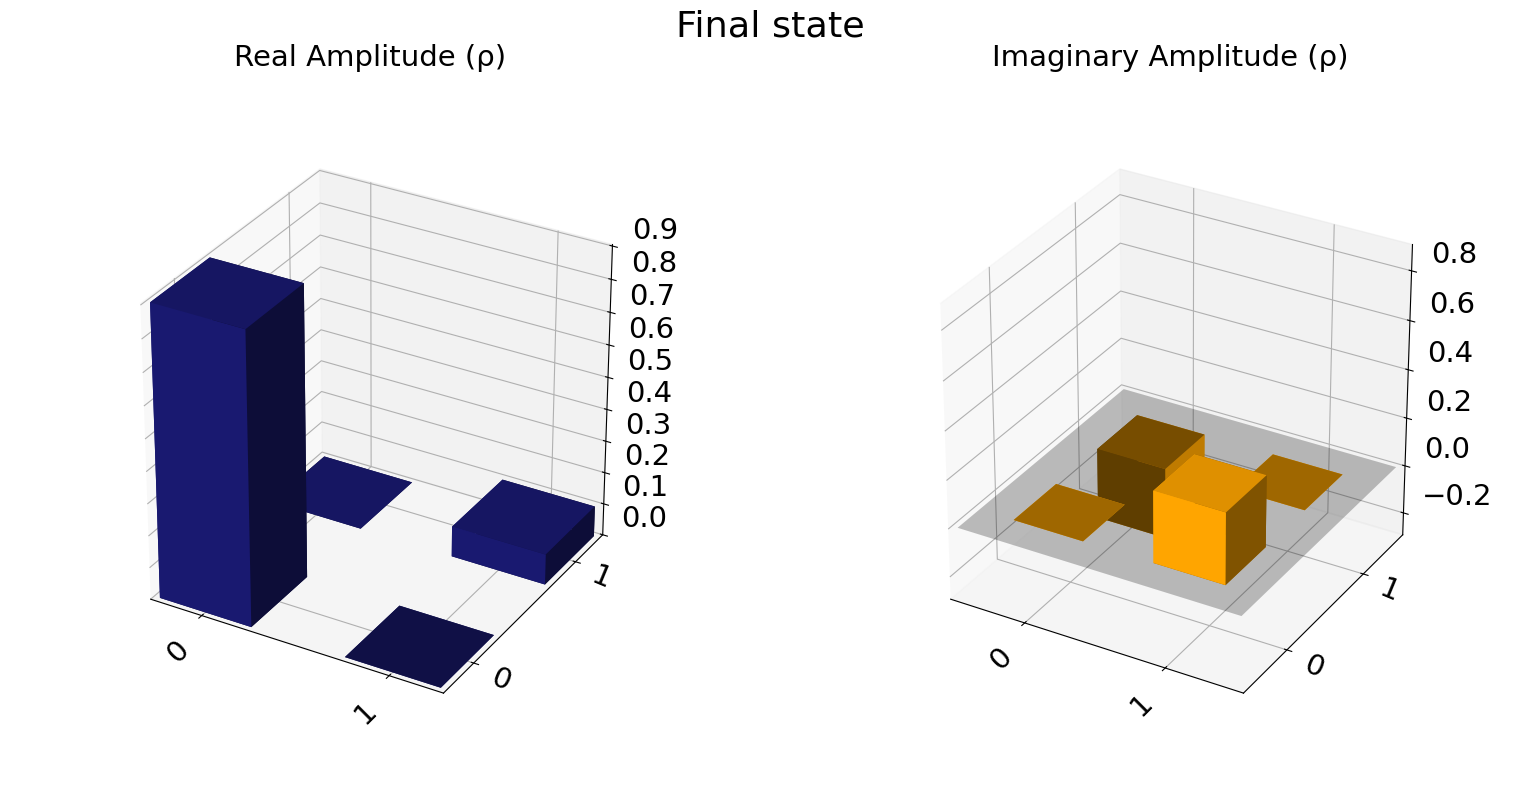

In [40]:
# plot_state_city(data['psi_0'], title='Final state', color=['midnightblue', 'orange'])
# plot_state_city(data['psi_1'], title='Final state', color=['midnightblue', 'orange'])
plot_state_city(data['psi_2'], title='Final state', color=['midnightblue', 'orange'])
# plot_state_city(data['psi_3'], title='Final state', color=['midnightblue', 'orange'])
# plot_state_city(data['psi_4'], title='Final state', color=['midnightblue', 'orange'])
# plot_state_city(data['psi_5'], title='Final state', color=['midnightblue', 'orange'])

## Set custom state_vector

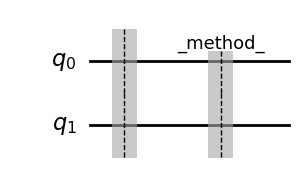

In [41]:
# Set initial state to random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

circ.draw(output='mpl')

In [42]:
# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

## Initializing from custom state_vector

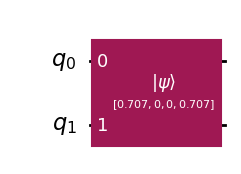

In [43]:
# Initialize the quantum circuit with a Bell State

qc = QuantumCircuit(2)
# psi = qi.random_statevector(4, seed=100)
psi = qi.Statevector([1, 0, 0, 1] / np.sqrt(2))

qc.initialize(psi, [0, 1])

qc.draw(output='mpl')

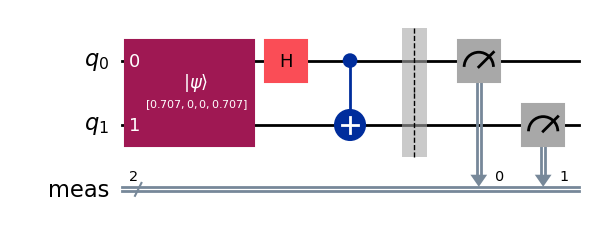

In [44]:
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw(output='mpl')

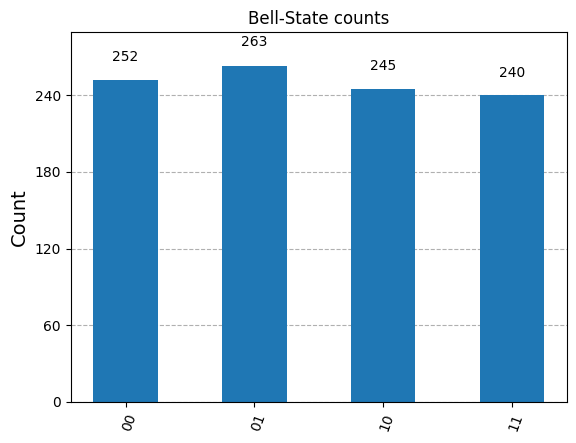

In [45]:
# Create a 2 qubit quantum circuit
simulator = AerSimulator()
# Transpile for simulator
qc = transpile(qc, simulator)

# Run and get saved data
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Bell-State counts')